#  <span style='color:blue'> **PRINCIPAL COMPONENT ANALYSIS**

This notebook implements Principal Component Analysis on Fashion MNIST Images

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

### The steps involved in PCA are:

1. Form the data matrix X (m * n)
2. Standardize the data matrix X (m * n)
3. Calculate the covariance matrix C (n * n)
4. Find the eigen value-vector pair for covariance matrix C
5. Form the projection matrix by using the top k eigen value-vector pair as the principal component (n * k)
6. Project the standardized data matrix on the projection matrix to form PCA (m * k)

### **1.FORM THE DATA MATRIX**

In [2]:
test_data = pd.read_csv('fashion-mnist_test.csv').sample(500,random_state=42)

In [3]:
labels = test_data['label']
pixels = test_data[test_data.columns.delete(0)]

In [4]:
X = np.array(pixels)

### **2.STANDARDIZE THE DATA MATRIX**

In [5]:
def standardize_data(X):
    mean = np.mean(X,axis=0)

    return (X - mean)

In [6]:
X_standardized = standardize_data(X)

### **3.CALCULATE THE COVARIANCE MATRIX**

In [7]:
def covariance_matrix(X):
    covariance_matrix = (1 / (X.shape[0]-1)) * (np.matmul(X.T,X))

    return covariance_matrix

In [8]:
cov_matrix = covariance_matrix(X_standardized)

### **4.FIND THE EIGENVALUE EIGENVECTOR PAIRS FOR THE COVARIANCE MATRIX**
### **5.FORM THE PROJECTION MATRIX USING TOP k PRINCIPAL COMPONENTS**

In [9]:
def projection_matrix(cov_X, k):
    eigvals, eigvecs = scipy.sparse.linalg.eigsh(cov_X,k)
    eigvals = eigvals[::-1]
    eigvecs = eigvecs[:,::-1]

    
    return eigvals, eigvecs

In [10]:
_, proj_matrix = projection_matrix(cov_matrix, 2)

### **6.PROJECT THE DATA MATRIX ONTO THE PROJECTION MATRIX**

In [11]:
def project_data(X,proj_matrix):
    pca = np.matmul(X, proj_matrix)

    return pca

In [12]:
X_pca = project_data(X_standardized,proj_matrix)

### ***Validating the implementation of PCA***

The reduced form of 100 images are plotted and close images on the plot and far away images on the plot are checked

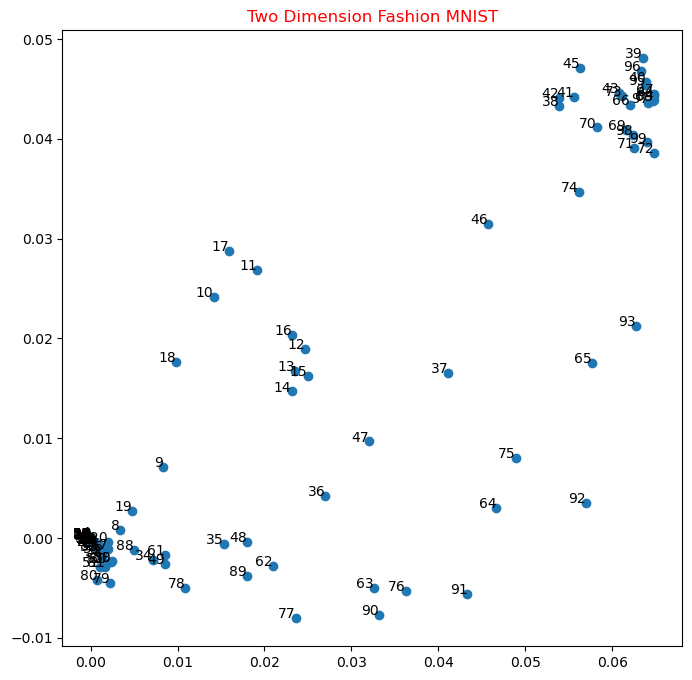

In [13]:
fig = plt.figure(figsize=(8,8))
plt.scatter(proj_matrix[:100,0],proj_matrix[:100,1])
plt.title('Two Dimension Fashion MNIST', color='red')

for i in range(100):
    plt.text(proj_matrix[i,0],proj_matrix[i,1],i,ha='right')

Images 42, 66 and 70 that are close on the plot

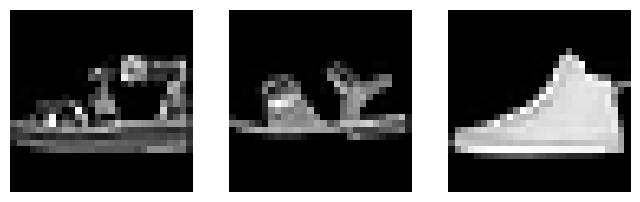

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(1,3)
ax[0].imshow(X[42].reshape(28,28),cmap='gray')
ax[1].imshow(X[66].reshape(28,28),cmap='gray')
ax[2].imshow(X[70].reshape(28,28),cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

Images 8, 47 and 92 that are far apart on the plot

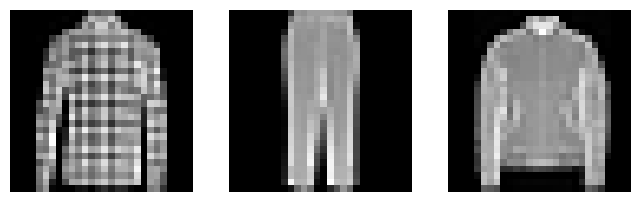

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(1,3)
ax[0].imshow(X[8].reshape(28,28),cmap='gray')
ax[1].imshow(X[47].reshape(28,28),cmap='gray')
ax[2].imshow(X[92].reshape(28,28),cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

Although the above examples show sets where the pca intuitively works, there are some sets with issues.
Such as images 71, 72 and 99 that are close on the plot but are quite different images

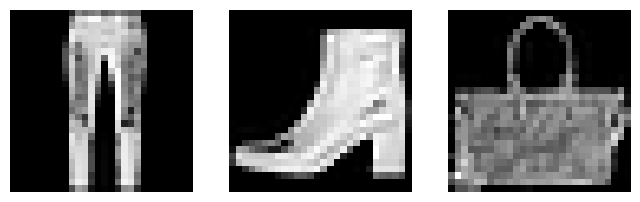

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(1,3)
ax[0].imshow(X[71].reshape(28,28),cmap='gray')
ax[1].imshow(X[72].reshape(28,28),cmap='gray')
ax[2].imshow(X[99].reshape(28,28),cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

This is because when reducing from n dimensions to k dimensions, some variance in our data is lost by dropping off principal components(i.e Eigenvectors).  
And in this case of reducing from 784 to 2 dimensions, lots of variance is lost.  
***The rule of thumb is to pick principal components that keep up to 95% of the data's variance.***

In [17]:
eigvals, eigvecs = projection_matrix(cov_matrix,500)

In [18]:
variance = eigvals / np.sum(eigvals)

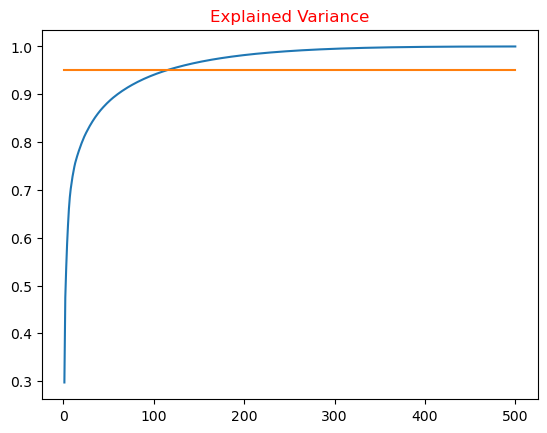

In [19]:
plt.plot(range(1,501),np.cumsum(variance))
plt.plot(range(1,501),[0.95]*500)
plt.title('Explained Variance', color='red')
plt.show()

From the above plot, it can be seen that to keep an explained variance of 95%, 115 principal components will be needed.  
***Hence, the optimal number of dimensions to reduce this 784 dimension dataset to is 115.*** 

### ***Reconstructing the original data from reduced data***

In [20]:
def reconstruct(pca, proj_matrix):
    return np.matmul(pca, proj_matrix.T)

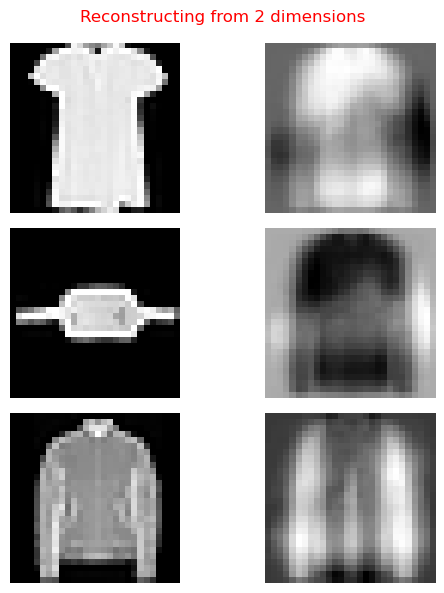

In [21]:
X2_rec = reconstruct(X_pca, proj_matrix)

fig = plt.figure(figsize=(6,6))
fig.suptitle('Reconstructing from 2 dimensions',color='red')
ax = fig.subplots(3,2)
ax[0,0].imshow(X[2].reshape(28,28),cmap='gray')
ax[0,1].imshow(X2_rec[2].reshape(28,28),cmap='gray')
ax[1,0].imshow(X[22].reshape(28,28),cmap='gray')
ax[1,1].imshow(X2_rec[22].reshape(28,28),cmap='gray')
ax[2,0].imshow(X[92].reshape(28,28),cmap='gray')
ax[2,1].imshow(X2_rec[92].reshape(28,28),cmap='gray')
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[2,0].axis('off')
ax[2,1].axis('off')
plt.tight_layout()
plt.show()

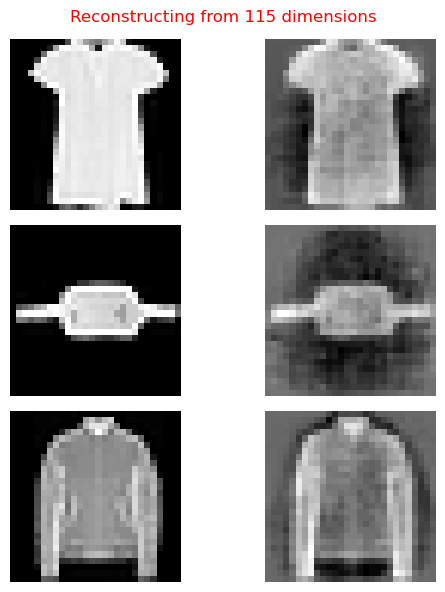

In [22]:
X_115 = project_data(X_standardized,eigvecs[:,:115])
X115_rec = reconstruct(X_115, eigvecs[:,:115])

fig = plt.figure(figsize=(6,6))
fig.suptitle('Reconstructing from 115 dimensions', color='red')
ax = fig.subplots(3,2)
ax[0,0].imshow(X[2].reshape(28,28),cmap='gray')
ax[0,1].imshow(X115_rec[2].reshape(28,28),cmap='gray')
ax[1,0].imshow(X[22].reshape(28,28),cmap='gray')
ax[1,1].imshow(X115_rec[22].reshape(28,28),cmap='gray')
ax[2,0].imshow(X[92].reshape(28,28),cmap='gray')
ax[2,1].imshow(X115_rec[92].reshape(28,28),cmap='gray')
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[2,0].axis('off')
ax[2,1].axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()